In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, lfilter, freqz

In [183]:
def ploteo(n_archivo):
    with open(n_archivo, 'r') as archivo:
        n = 0
        signal = np.array([])
        for linea in archivo:
            if n > 2:
                vec = linea.split()
                signal = np.append(signal, int(vec[6])) 
                n += 1
            else:
                n += 1
        fs = 1000  # Frecuencia de muestreo
        ts = 1 / fs
        t = np.arange(len(signal)) * ts
        return t, signal, fs

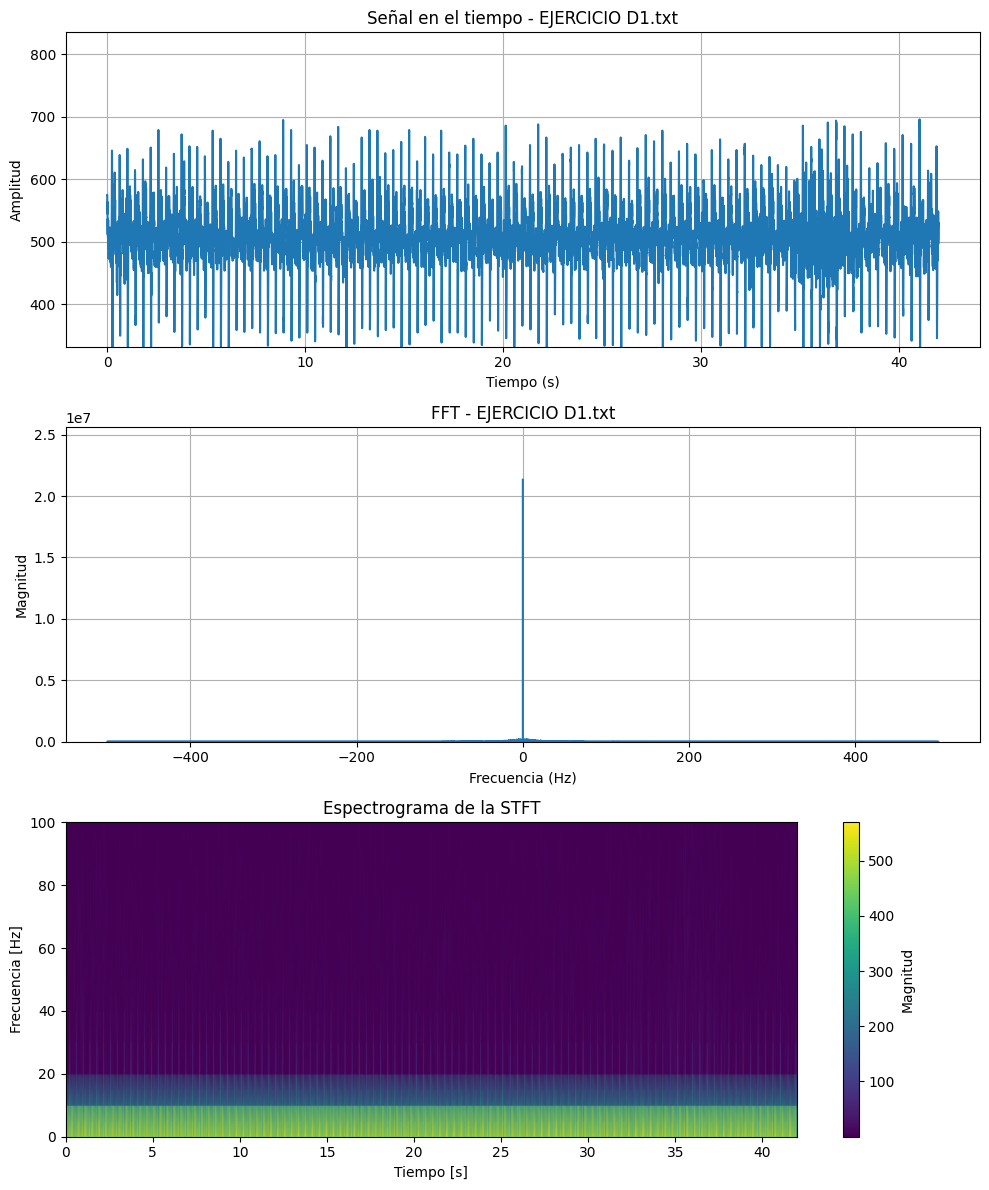

In [187]:

E1 = ["EJERCICIO D1.txt"]

# Parámetros para la STFT
nperseg = 100  #
fmax = 50   

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

for i in E1:
    t, signal_data, fs = ploteo(i)  

    axs[0].plot(t, signal_data)
    axs[0].set_title(f"Señal en el tiempo - {i}")
    axs[0].set_xlabel("Tiempo (s)")
    axs[0].set_ylabel("Amplitud")
    axs[0].grid()
    axs[0].set_ylim(min(signal_data) * 1.2, max(signal_data) * 1.2)  

    # FFT de la señal
    X = np.fft.fft(signal_data)
    freqs = np.fft.fftfreq(len(X), d=1/fs)

    # Magnitud de la FFT
    fft_magnitude = np.abs(X)
    
    # Graficamos la FFT
    axs[1].plot(freqs, fft_magnitude)
    axs[1].set_title(f"FFT - {i}")
    axs[1].set_xlabel("Frecuencia (Hz)")
    axs[1].set_ylabel("Magnitud")
    axs[1].grid()
    axs[1].set_ylim(0, max(fft_magnitude) * 1.2)  # Ajuste del eje Y para la FFT

    # Calcular la STFT
    f, t_stft, Zxx = signal.stft(signal_data, fs, nperseg=nperseg)

    # Graficar el espectrograma
    im = axs[2].pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
    axs[2].set_title('Espectrograma de la STFT')
    axs[2].set_ylabel('Frecuencia [Hz]')
    axs[2].set_xlabel('Tiempo [s]')
    axs[2].set_ylim(0, 2 * fmax)  
    fig.colorbar(im, ax=axs[2], label='Magnitud') 

plt.tight_layout()
plt.show()


(2.5, 10.0)

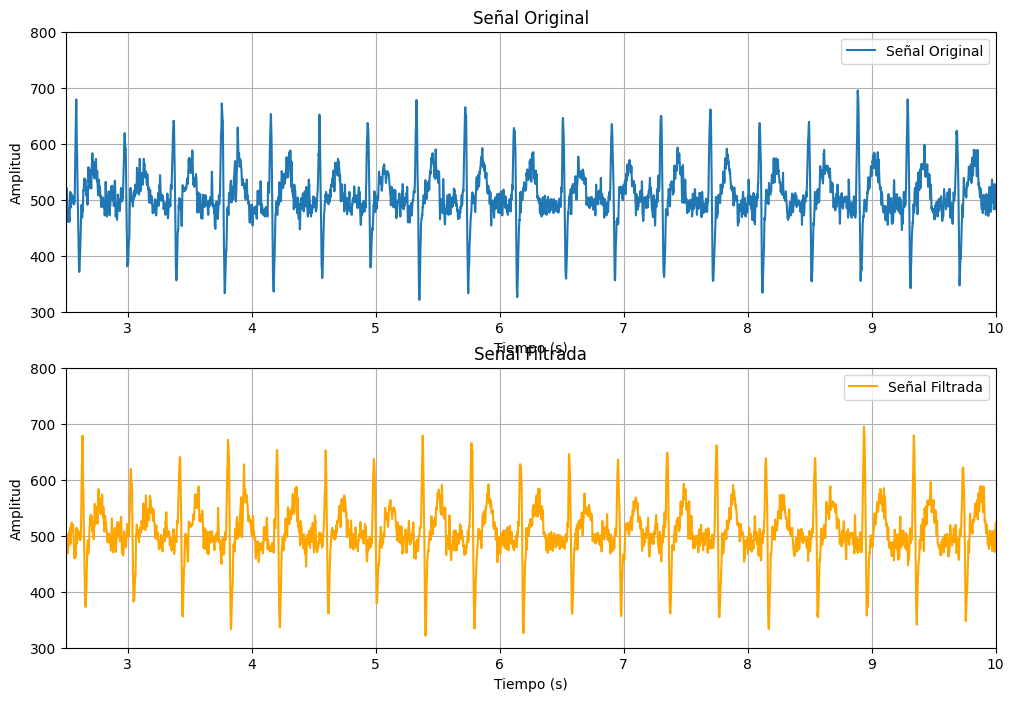

In [177]:
frecuencia_corte = 250  
orden_filtro = 101  
fs = 1000  

coeficientes_filtro = firwin(numtaps=orden_filtro, cutoff=frecuencia_corte, fs=fs)

signal_filtrada = lfilter(coeficientes_filtro, 1.0, signal_data)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Graficar la señal original en el dominio del tiempo
axs[0].plot(t, signal_data, label='Señal Original')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Señal Original')
axs[0].legend()
axs[0].grid()
axs[0].set_ylim([300, 800])  
axs[0].set_xlim([2.5, 10])

# Graficar la señal filtrada en el dominio del tiempo
axs[1].plot(t, signal_filtrada, label='Señal Filtrada', color='orange')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Señal Filtrada')
axs[1].legend()
axs[1].grid()
axs[1].set_ylim([300, 800])  
axs[1].set_xlim([2.5, 10])

<Figure size 640x480 with 0 Axes>

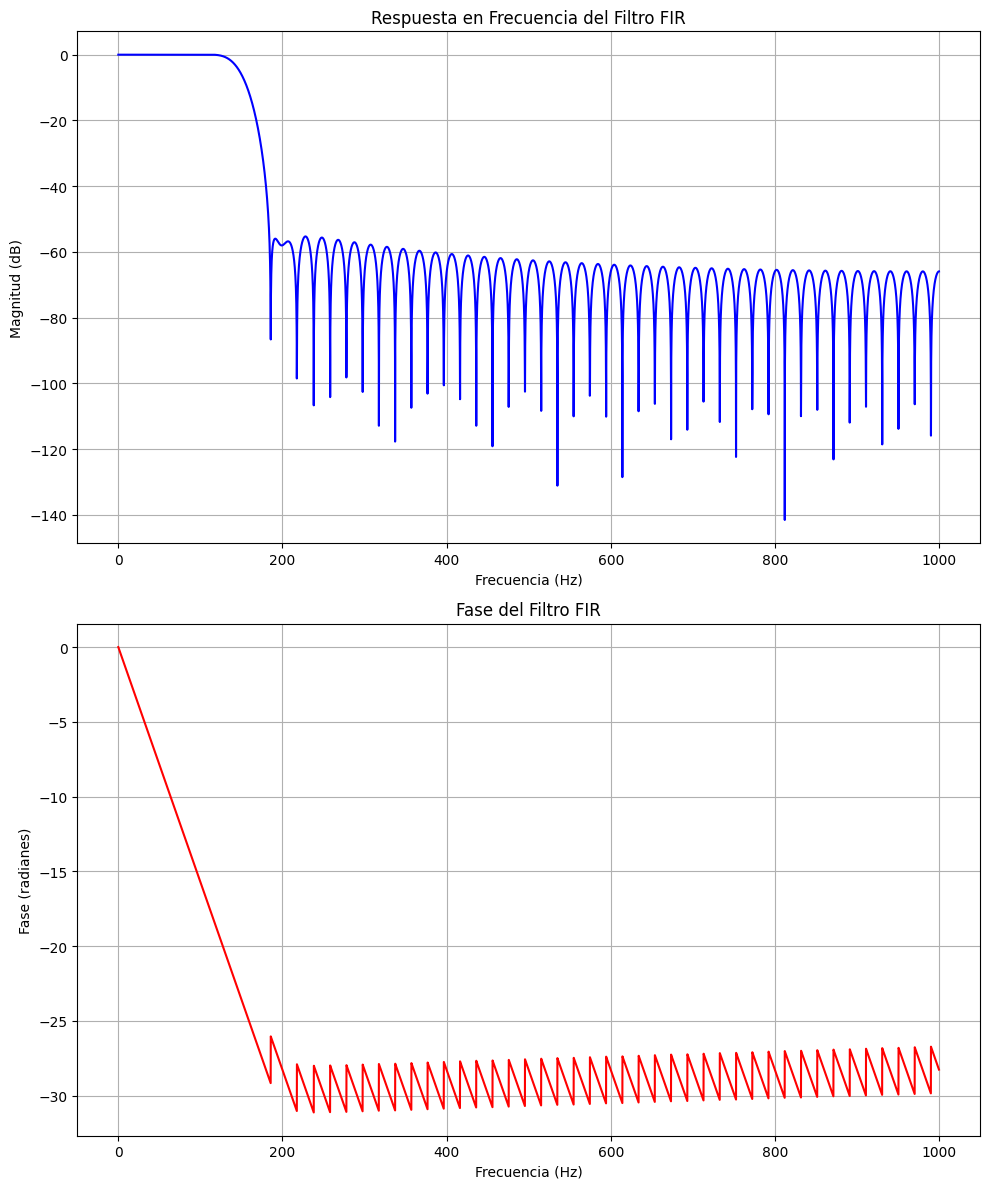

In [140]:

plt.tight_layout()
plt.show()

w, h = freqz(coeficientes_filtro, worN=8000, fs=fs)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 1. Graficar la respuesta en frecuencia (Magnitud)
axs[0].plot(w, 20 * np.log10(np.abs(h)), 'b')
axs[0].set_title('Respuesta en Frecuencia del Filtro FIR')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Magnitud (dB)')
axs[0].grid()

# 2. Graficar la fase del filtro FIR (desenvolviendo la fase)
axs[1].plot(w, np.unwrap(np.angle(h)), 'r')
axs[1].set_title('Fase del Filtro FIR')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Fase (radianes)')
axs[1].grid()

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10516\2686057310.py:10: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')


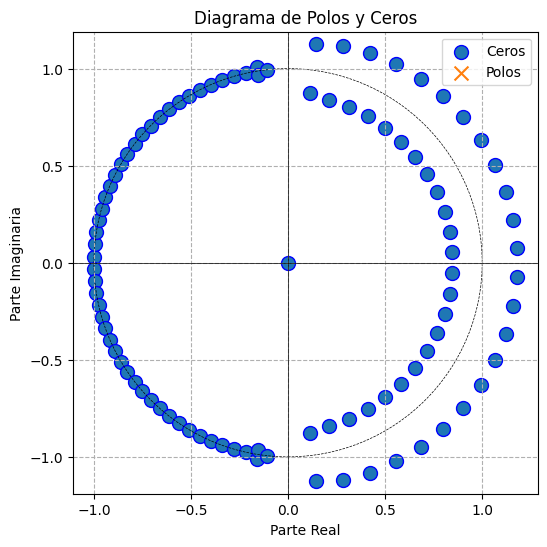

In [178]:
def plot_poles_zeros(b, a=1):
    """Graficar el diagrama de polos y ceros."""
    z, p, k = tf2zpk(b, a) 
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(z), np.imag(z), marker='o', s=100, label='Ceros', edgecolor='blue')
    plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')

    # Dibujar círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=0.5)
    plt.gca().add_artist(unit_circle)

    plt.title('Diagrama de Polos y Ceros')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.axis('equal')  
    plt.show()

plot_poles_zeros(coeficientes_filtro)

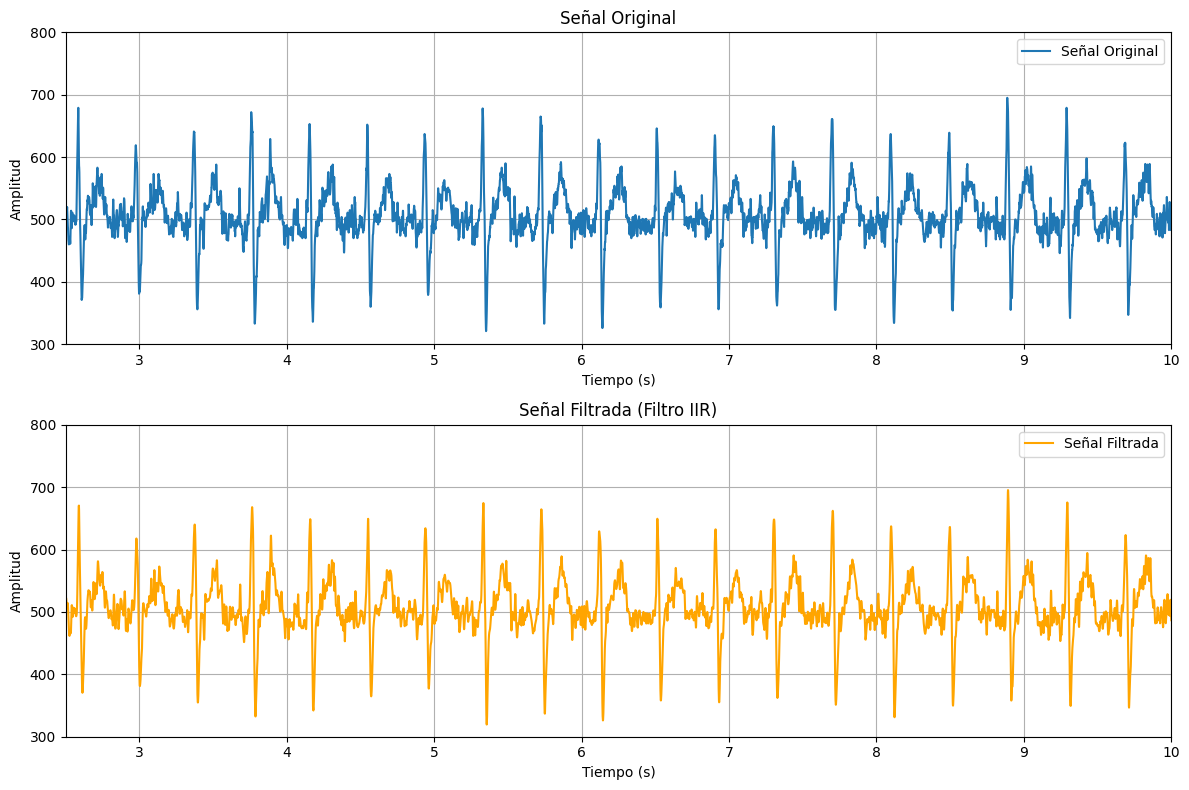

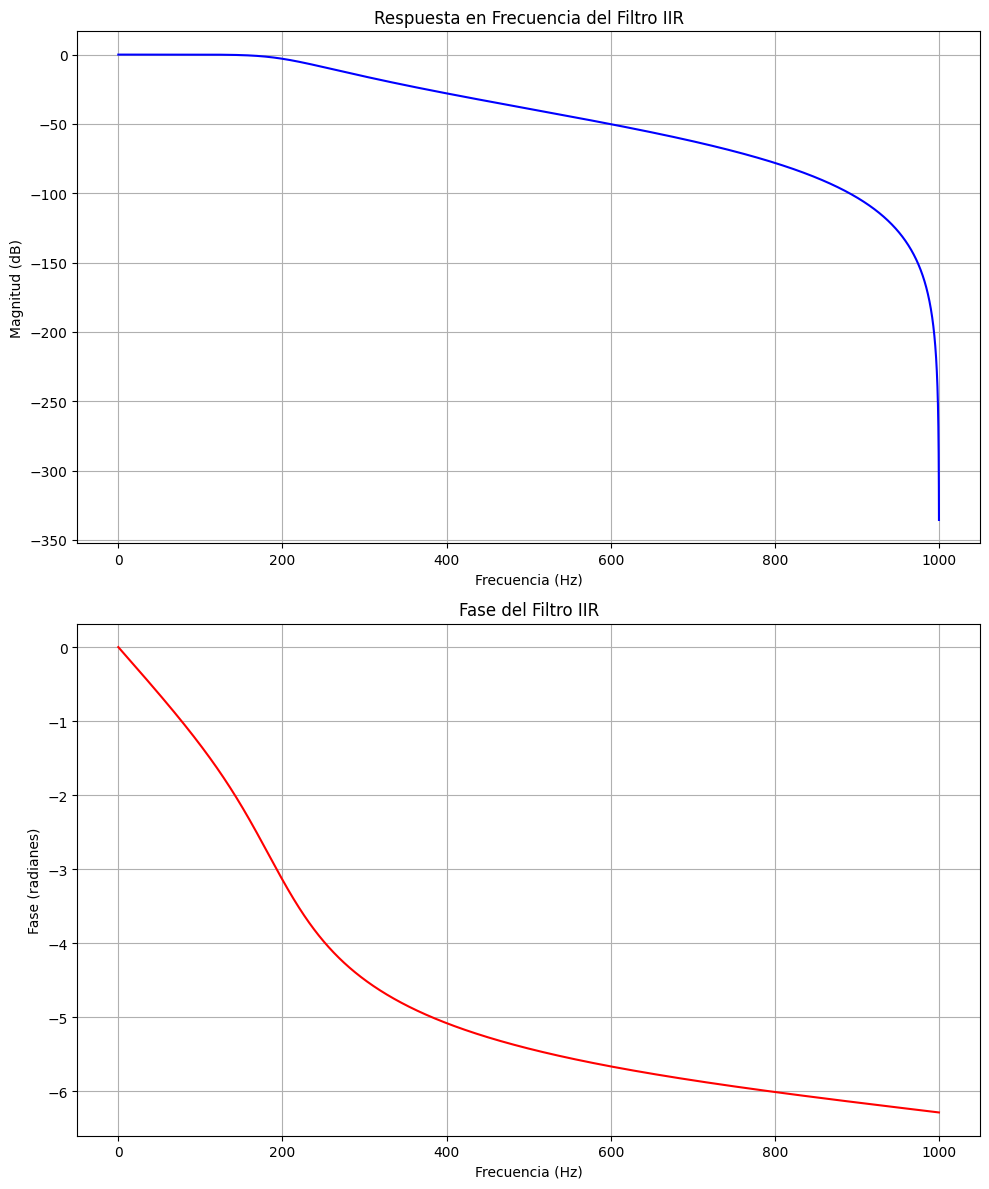

C:\Users\USER\AppData\Local\Temp\ipykernel_10516\2216004588.py:74: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')


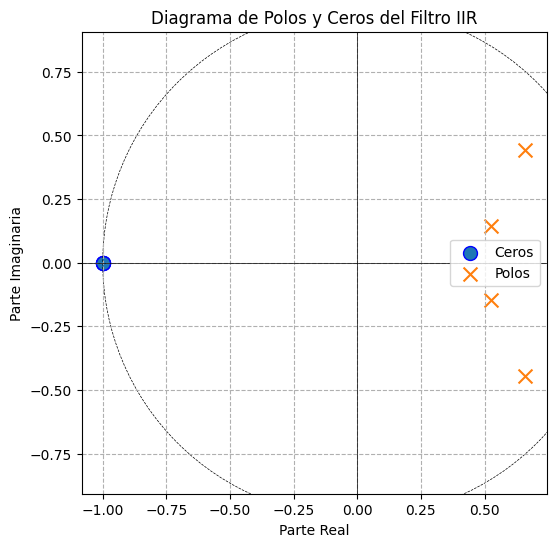

In [179]:
from scipy.signal import butter, lfilter, freqz, tf2zpk
import matplotlib.pyplot as plt
import numpy as np


frecuencia_corte = 200  
orden_filtro = 4
fs = 2000  

b, a = butter(orden_filtro, frecuencia_corte / (0.5 * fs), btype='low', analog=False)

signal_filtrada = lfilter(b, a, signal_data)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(t, signal_data, label='Señal Original')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Señal Original')
axs[0].legend()
axs[0].grid()
axs[0].set_ylim([300, 800])  
axs[0].set_xlim([2.5, 10]) 

axs[1].plot(t, signal_filtrada, label='Señal Filtrada', color='orange')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Señal Filtrada (Filtro IIR)')
axs[1].legend()
axs[1].grid()
axs[1].set_ylim([300, 800])  
axs[1].set_xlim([2.5, 10]) 
plt.tight_layout()
plt.show()

w, h = freqz(b, a, worN=8000, fs=fs)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(w, 20 * np.log10(np.abs(h)), 'b')
axs[0].set_title('Respuesta en Frecuencia del Filtro IIR')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Magnitud (dB)')
axs[0].grid()

axs[1].plot(w, np.unwrap(np.angle(h)), 'r')
axs[1].set_title('Fase del Filtro IIR')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Fase (radianes)')
axs[1].grid()

plt.tight_layout()
plt.show()


def plot_poles_zeros(b, a):
    """Graficar el diagrama de polos y ceros."""
    z, p, k = tf2zpk(b, a)  
    plt.figure(figsize=(6, 6))
    
    plt.scatter(np.real(z), np.imag(z), marker='o', s=100, label='Ceros', edgecolor='blue')
    
    plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')

    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=0.5)
    plt.gca().add_artist(unit_circle)


    plt.title('Diagrama de Polos y Ceros del Filtro IIR')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.axis('equal')  
    plt.show()

plot_poles_zeros(b, a)


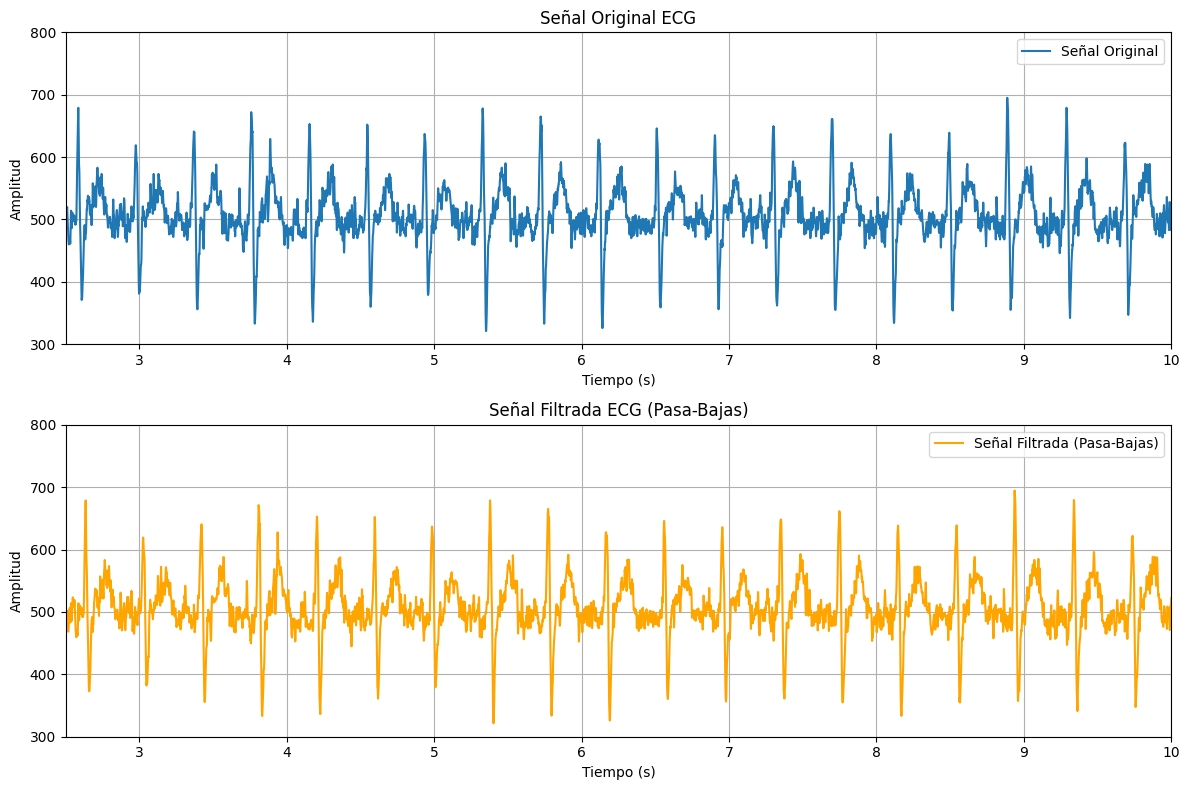

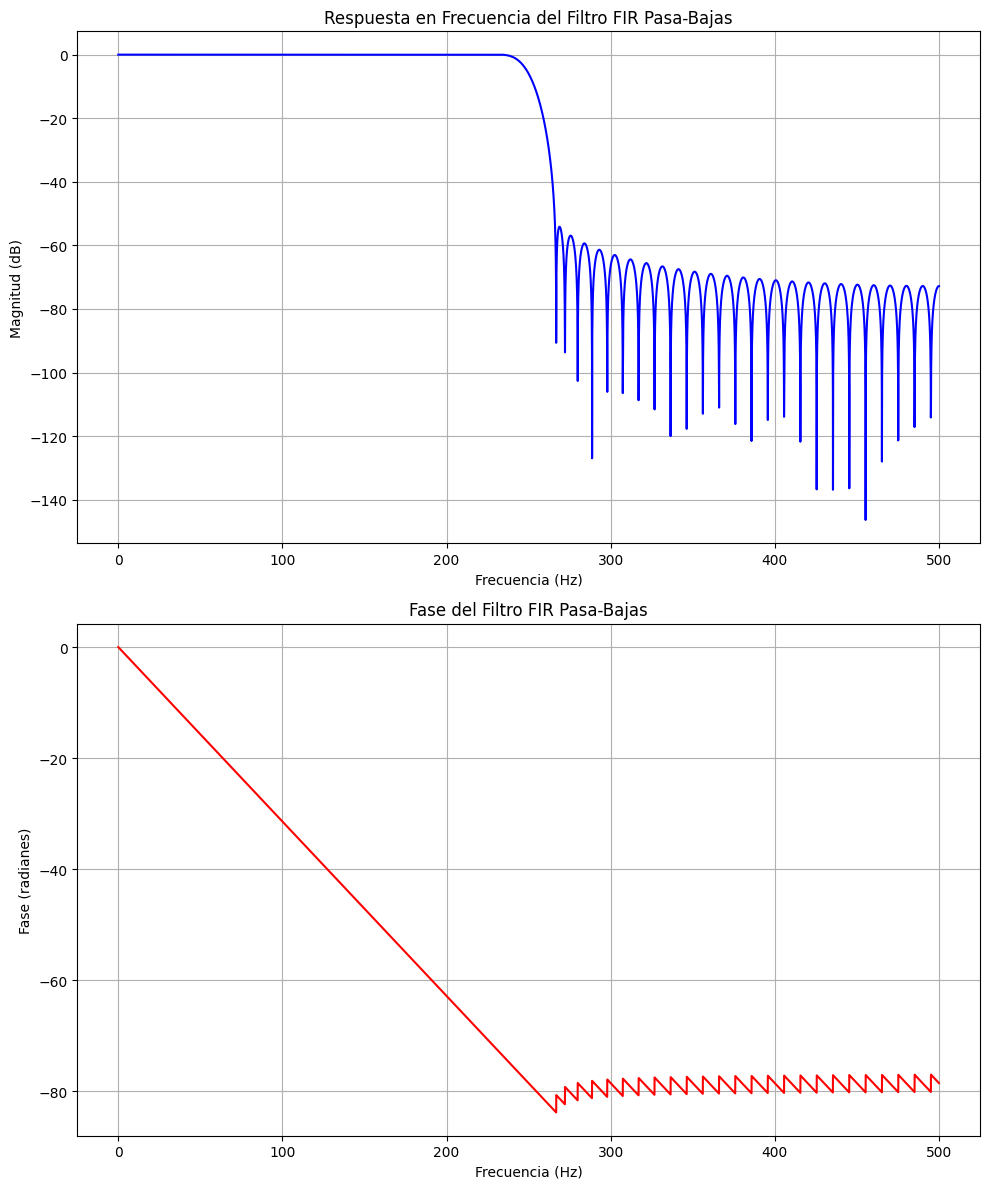

C:\Users\USER\AppData\Local\Temp\ipykernel_10516\489403868.py:71: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')


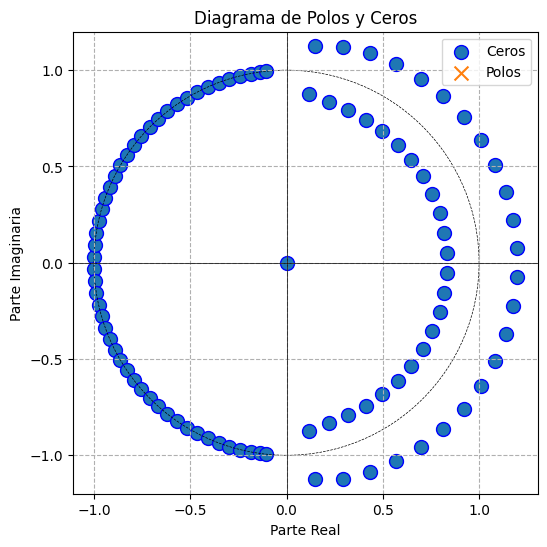

In [180]:
fs = 1000  
frecuencia_corte = 250 
orden_filtro = 101  
beta = 5.0  

coeficientes_filtro = firwin(numtaps=orden_filtro, cutoff=frecuencia_corte, window=('kaiser', beta), fs=fs)

signal_filtrada = lfilter(coeficientes_filtro, 1.0, signal_data)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(t, signal_data, label='Señal Original')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Señal Original ECG')
axs[0].legend()
axs[0].grid()
axs[0].set_ylim([300, 800])  
axs[0].set_xlim([2.5, 10])

axs[1].plot(t, signal_filtrada, label='Señal Filtrada (Pasa-Bajas)', color='orange')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Señal Filtrada ECG (Pasa-Bajas)')
axs[1].legend()
axs[1].grid()
axs[1].set_ylim([300, 800])  
axs[1].set_xlim([2.5, 10])

plt.tight_layout()
plt.show()

w, h = freqz(coeficientes_filtro, worN=8000, fs=fs)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(w, 20 * np.log10(np.abs(h)), 'b')
axs[0].set_title('Respuesta en Frecuencia del Filtro FIR Pasa-Bajas')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Magnitud (dB)')
axs[0].grid()

axs[1].plot(w, np.unwrap(np.angle(h)), 'r')
axs[1].set_title('Fase del Filtro FIR Pasa-Bajas')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Fase (radianes)')
axs[1].grid()

plt.tight_layout()
plt.show()

def plot_poles_zeros(b, a=1):
    """Graficar el diagrama de polos y ceros."""
    z, p, k = tf2zpk(b, a)
    plt.figure(figsize=(6, 6))
    
    plt.scatter(np.real(z), np.imag(z), marker='o', s=100, label='Ceros', edgecolor='blue')
    
    plt.scatter(np.real(p), np.imag(p), marker='x', s=100, label='Polos', edgecolor='red')

    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=0.5)
    plt.gca().add_artist(unit_circle)

    plt.title('Diagrama de Polos y Ceros')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.axis('equal')
    plt.show()

plot_poles_zeros(coeficientes_filtro)


